In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

In [2]:
image_path = './input.png'
image = imread(image_path, mode='L')
print('Shape of image: ', image.shape)

Shape of image:  (367, 590)


C:\Users\Admin\AppData\Local\Temp\ipykernel_1644\2392784655.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread(image_path, mode='L')


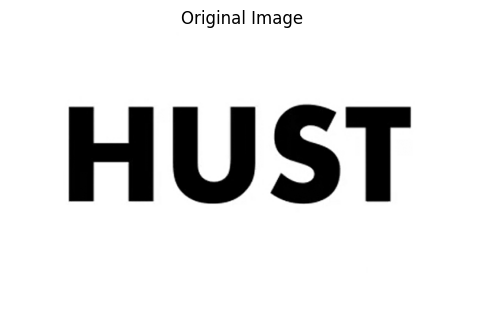

In [3]:
# Function to visualize the image
def visualize_image(image, title='Original Image'):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

visualize_image(image)

In [12]:
def visualize_images(images, titles):
    num_images = len(images)
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.title(titles[i])
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.show()

In [10]:
# Function to create a box blur kernel
def box_blur_kernel(size):
    # Create a kernel of the given size where all elements are 1/(size*size)
    # This ensures the sum of the kernel elements is 1, making it an averaging filter
    return np.ones((size, size)) / (size * size)

# Function to apply convolution
def apply_convolution(image, kernel):
    # Initialize an output array of the same shape as the input image
    output = np.zeros_like(image)

    # Pad the image to handle borders during convolution
    # Padding is done with edge values (replicating the edge pixels)
    image_padded = np.pad(image, ((kernel.shape[0]//2, kernel.shape[0]//2),
                                  (kernel.shape[1]//2, kernel.shape[1]//2)), mode='edge')

    # Iterate over every pixel in the image
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            # Apply the convolution operation (element-wise multiplication and sum)
            output[x, y] = np.sum(kernel * image_padded[x:x+kernel.shape[0], y:y+kernel.shape[1]])

    # Return the convolved image
    return output

# Function to apply box blur
def apply_box_blur(image, kernel_size=3):
    # Create the box blur kernel
    kernel = box_blur_kernel(kernel_size)

    # Apply the convolution with the box blur kernel
    blurred_image = apply_convolution(image, kernel)

    # Return the blurred image
    return blurred_image

# Function to iteratively apply the blur function n times
def iterative_blur(image, kernel_size=3, n=5):
    # List to store the intermediate blurred images, starting with the original image
    images = [image]

    # Initialize the current image as the original image
    current_image = image

    # Apply the box blur iteratively n times
    for i in range(n):
        # Apply the box blur to the current image
        current_image = apply_box_blur(current_image, kernel_size)

        # Append the blurred image to the list
        images.append(current_image)

    # Return the list of images, including the original and all intermediate blurs
    return images

In [25]:
shadow_images = iterative_blur(image, kernel_size=3, n=500)

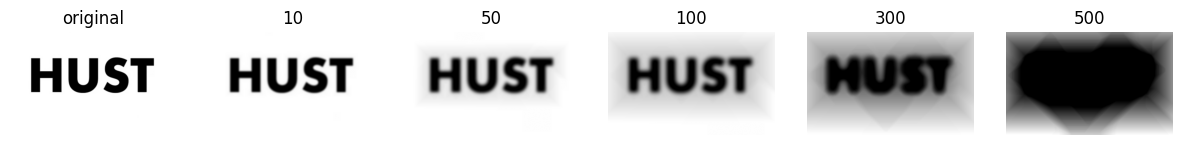

In [26]:
visualize_images([image, shadow_images[10], shadow_images[50], shadow_images[100], shadow_images[300], shadow_images[500]], ['original', '10', '50', '100', '300', '500'])

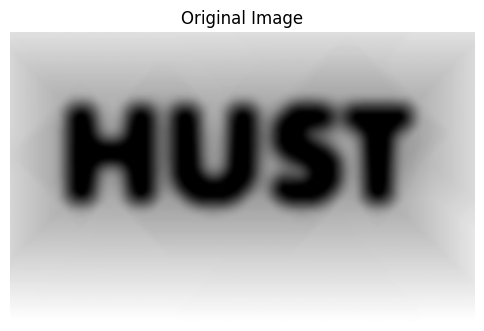

In [37]:
visualize_image(shadow_images[200])

In [40]:
def create_shift_filter(direction):
    size = 3  # Using a 3x3 filter
    filter = np.zeros((size, size))

    if direction == 'left':
        filter[size//2, min(size//2 + 1, size-1)] = 1
    elif direction == 'right':
        filter[size//2, max(size//2 - 1, 0)] = 1

    elif direction == 'up':
        filter[min(size//2 + 1, size-1), size//2] = 1
    elif direction == 'down':
        filter[max(size//2 - 1, 0), size//2] = 1

    return filter

# Function to apply shifting filter
def apply_shifting_filter(image, direction):
    kernel = create_shift_filter(direction)
    shifted_image = apply_convolution(image, kernel)
    return shifted_image

# Function to iteratively apply the shifting filter n times and save the images
def iterative_shift(image, direction, n):
    images = [image]
    current_image = image
    for i in range(n):
        current_image = apply_shifting_filter(current_image, direction)
        images.append(current_image)
        # save_image(current_image, f'shifted_image_{direction}_{i+1}.png', title=f'Shift {direction} - {i+1}')
    return images

In [90]:
direction = 'left'
n = 20

shifted_shadow_images_left = iterative_shift(shadow_images[50], direction, n)
left_10 = shifted_shadow_images_left[10]
left_20 = shifted_shadow_images_left[20]

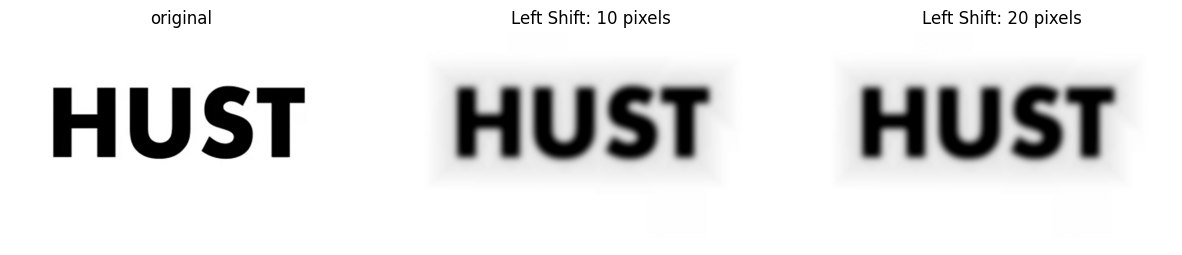

In [91]:
visualize_images([image, left_10, left_20], ['original','Left Shift: 10 pixels', 'Left Shift: 20 pixels'])

In [92]:
direction = 'down'  # Direction to shift ('left', 'right', 'up', 'down')
n = 20              # Number of iterations

shifted_shadow_images_down = iterative_shift(shifted_shadow_images_left[20], direction, n)
down_10  = shifted_shadow_images_down[10]
down_20 = shifted_shadow_images_down[20]

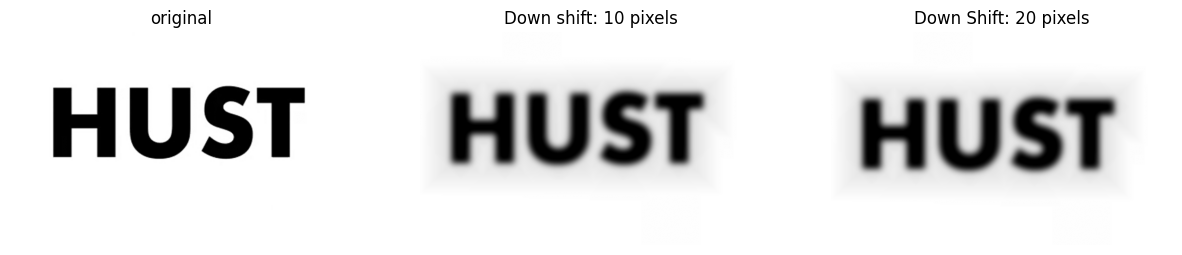

In [93]:
visualize_images([image, down_10, down_20], ['original','Down shift: 10 pixels', 'Down Shift: 20 pixels'])

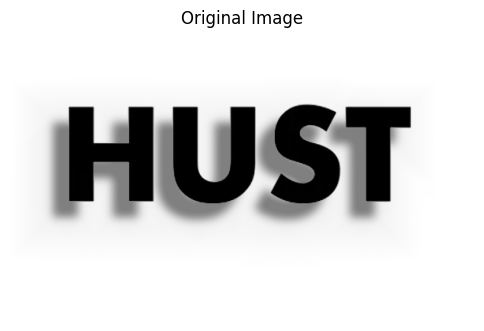

In [110]:
final = np.minimum(final_shadow, image)
visualize_image(final)

In [111]:
def save_image(image, filename, title='Image'):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

# Example usage
# Read the image
# image_path = '/mnt/data/image.png'  # Replace with your image path
# image = imread(image_path, pilmode='F')  # Use pilmode='F' for a floating-point grayscale image

# Save the original image
save_image(final, 'shadow_text.png', title='Shadow Text Image')